In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install RandomOverSampler

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement RandomOverSampler (from versions: none)
ERROR: No matching distribution found for RandomOverSampler


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade seaborn matplotlib imbalanced-learn scipy numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
conda install -c conda-forge seaborn matplotlib imbalanced-learn scipy numpy pandas

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\nagar\anaconda3\envs\davakhane

  added / updated specs:
    - imbalanced-learn
    - matplotlib
    - numpy
    - pandas
    - scipy
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            2_gnu          48 KB  conda-forge
    brotli-1.1.0               |       hfd05255_4          20 KB  conda-forge
    brotli-bin-1.1.0           |       hfd05255_4          21 KB  conda-forge
    cairo-1.18.4               |       h5782bbf_0         1.5 MB  conda-forge
    contourpy-1.3.3            |  py312hf90b1b7_2         220 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_1          13 KB  conda-forge
    double-conversion-3.3.1    |       he0c23c2_0          70 KB  conda-forge
    font-ttf

In [23]:
pip install RandomOverSampler

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement RandomOverSampler (from versions: none)
ERROR: No matching distribution found for RandomOverSampler


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")


## Import Dataset

In [34]:
df = pd.read_csv("dataset.csv")
df.head()

,Patient ID,Timestamp,Age,Gender,Weight,Height,BMI,Heart Rate,BP Systolic,BP Diastolic,SpO2,Respiration Rate,Body Temperature,Blood Glucose,Activity Level,Sleep Pattern
0,13,13-10-2025 16:50,40,Female,58.70038848,170.4094907,20.21405386,76.58680414,128.8826945,87.38316928,96.25592633,16.16185502,99.07677324,124.6900112,48,1
1,1,15-10-2025 07:10,77,Female,80.12666728,167.1793494,28.66895204,71.52149326,115.3069482,68.88272289,97.37895286,16.33313168,98.93110379,108.9762947,55,1
2,1,10-05-2025 21:50,77,Female,80.12666728,167.1793494,28.66895204,70.48309483,106.9585367,79.96893303,98.3274331,16.78490009,98.36750288,98.38661462,44,1
3,9,22-10-2025 01:20,71,Female,62.48597625,176.6769401,20.01809847,74.12814507,115.575141,71.37342474,98.3046963,14.77765795,98.24365978,82.21480161,52,1
4,5,15-04-2025 04:20,44,Male,63.15993653,164.1298043,23.44589316,67.57105683,139.1884179,76.36215884,98.45240715,16.64646459,99.12341595,97.65749733,43,0


## EDA

In [35]:
df.shape

(20975, 16)

In [36]:
# checking for null values
df.isnull().sum()

Patient ID             0
Timestamp              2
Age                    2
Gender                 2
Weight                 2
Height                 2
BMI                    2
Heart Rate             2
BP Systolic            2
BP Diastolic           2
SpO2                1014
Respiration Rate       2
Body Temperature       2
Blood Glucose          2
Activity Level         2
Sleep Pattern          2
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975 entries, 0 to 20974
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient ID        20975 non-null  object
 1   Timestamp         20973 non-null  object
 2   Age               20973 non-null  object
 3   Gender            20973 non-null  object
 4   Weight            20973 non-null  object
 5   Height            20973 non-null  object
 6   BMI               20973 non-null  object
 7   Heart Rate        20973 non-null  object
 8   BP Systolic       20973 non-null  object
 9   BP Diastolic      20973 non-null  object
 10  SpO2              19961 non-null  object
 11  Respiration Rate  20973 non-null  object
 12  Body Temperature  20973 non-null  object
 13  Blood Glucose     20973 non-null  object
 14  Activity Level    20973 non-null  object
 15  Sleep Pattern     20973 non-null  object
dtypes: object(16)
memory usage: 2.6+ MB


In [38]:
df.describe()

,Patient ID,Timestamp,Age,Gender,Weight,Height,BMI,Heart Rate,BP Systolic,BP Diastolic,SpO2,Respiration Rate,Body Temperature,Blood Glucose,Activity Level,Sleep Pattern
count,20975,20973,20973,20973,20973,20973,20973,20973,20973,20973,19961,20973,20973,20973,20973,20973
unique,24,9520,19,3,22,22,22,10487,10487,10487,9981,10486,10486,10487,50,4
top,14,27-07-2025 16:50,44,Female,81.4414523,159.8355165,31.87857735,76.58680414,128.8826945,87.38316928,96.25592633,16.77580992,99.00602772,124.6900112,51,1
freq,1130,8,2112,13648,1130,1130,1130,2,2,2,2,4,4,2,1192,10394


In [39]:
# checking distribution for target column
df['Sleep Pattern'].value_counts()

Sleep Pattern
1                10394
2                 6372
0                 4206
Sleep Pattern        1
Name: count, dtype: int64

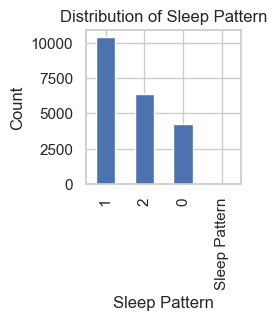

In [41]:
value_counts = df['Sleep Pattern'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Sleep Pattern')
plt.ylabel('Count')
plt.title('Distribution of Sleep Pattern')

# Show the plot
plt.show()

<Axes: >

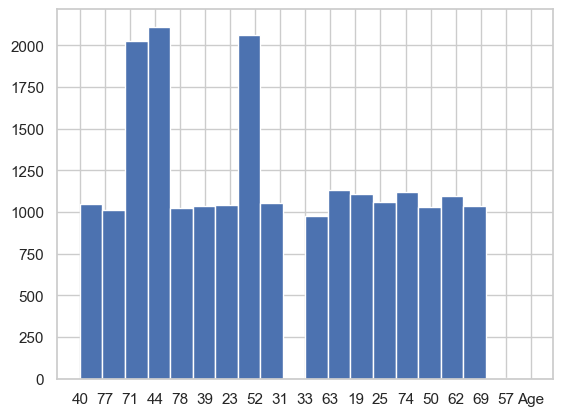

In [42]:
# checking distribution for age col
df['Age'].hist(bins=20)

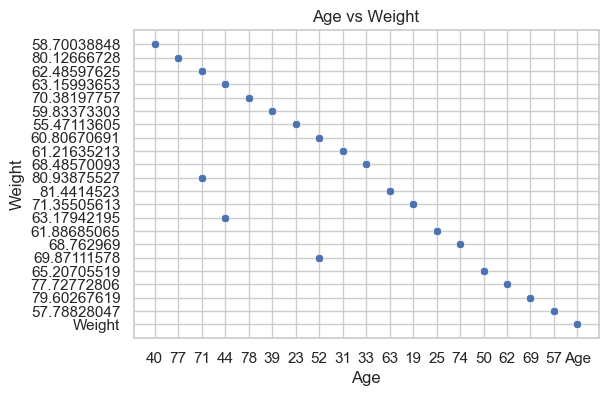

In [44]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Weight', data=df)
plt.title('Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

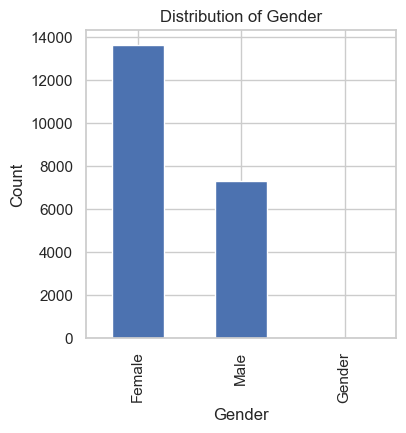

In [45]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

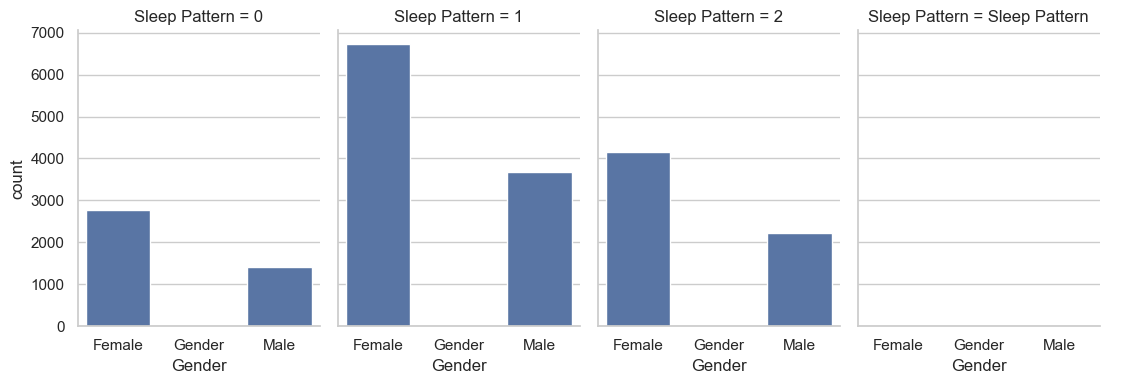

In [48]:
data = df.groupby(['Gender','Sleep Pattern'])['Patient ID'].count().to_frame().rename(columns={'Patient ID':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count", col="Sleep Pattern", data=data, kind="bar", height=4, aspect=.7)


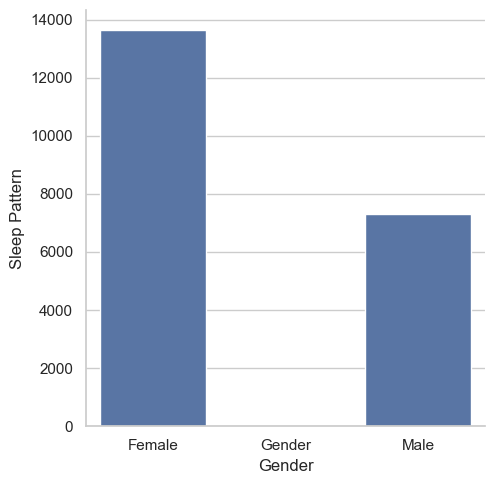

In [50]:
# Example: count Sleep Pattern by Gender
data = df.groupby(['Gender'])['Sleep Pattern'].count().to_frame().reset_index()

sns.catplot(x="Gender", y="Sleep Pattern", data=data, kind="bar")



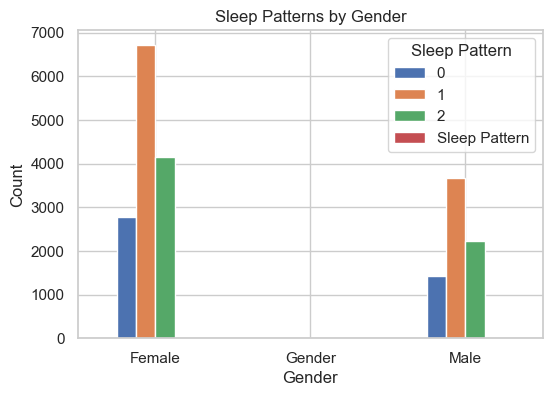

In [53]:
# Count Sleep Pattern occurrences by gender
pattern_counts = df.groupby("Gender")["Sleep Pattern"].value_counts().unstack()

# Plot
pattern_counts.plot(kind='bar', figsize=(6,4))
plt.title("Sleep Patterns by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



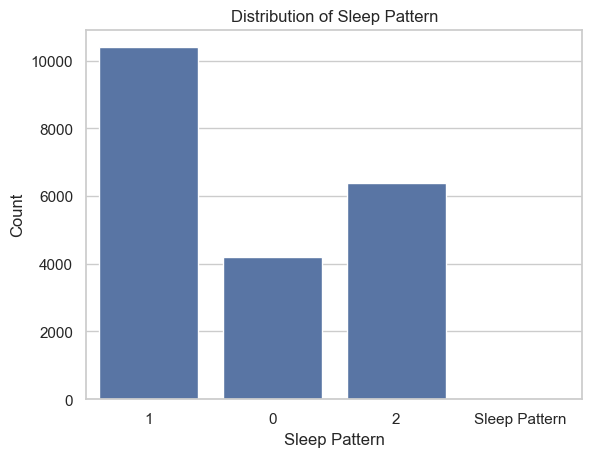

In [54]:
# Distribution of Sleep Pattern
sns.countplot(x="Sleep Pattern", data=df)
plt.title("Distribution of Sleep Pattern")
plt.xlabel("Sleep Pattern")
plt.ylabel("Count")
plt.show()


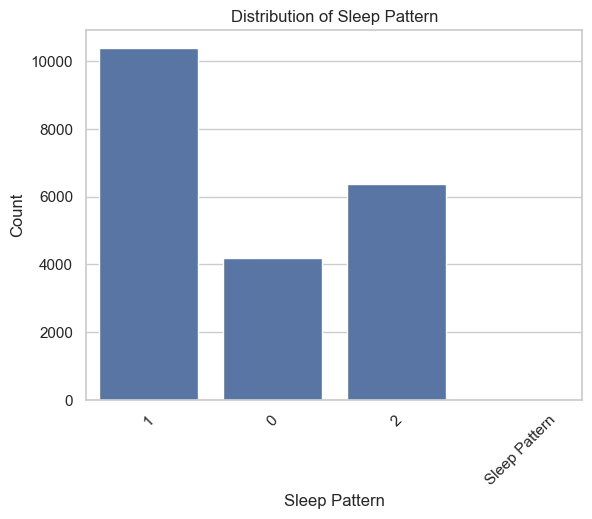

In [56]:
# Checking sleep pattern distribution
sns.countplot(x='Sleep Pattern', data=df)
plt.xlabel('Sleep Pattern')
plt.ylabel('Count')
plt.title('Distribution of Sleep Pattern')
plt.xticks(rotation=45)
plt.show()


In [57]:
data = (
    df.groupby(['Sleep Pattern','Gender'])['Patient ID']
    .count()
    .to_frame()
    .rename(columns={'Patient ID':'count'})
    .reset_index()
)
print(data)


   Sleep Pattern  Gender  count
0              0  Female   2782
1              0    Male   1424
2              1  Female   6718
3              1    Male   3676
4              2  Female   4148
5              2    Male   2224
6  Sleep Pattern  Gender      1


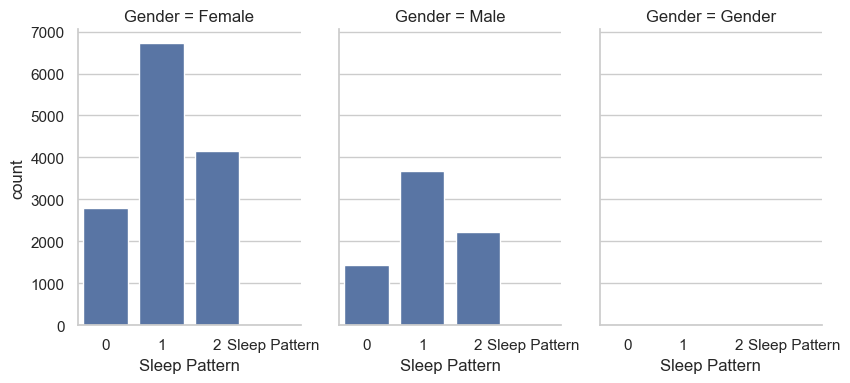

In [58]:
# Grouping
data = (
    df.groupby(['Sleep Pattern','Gender'])['Patient ID']
    .count()
    .to_frame()
    .rename(columns={'Patient ID':'count'})
    .reset_index()
)

# Plot
g = sns.catplot(
    x="Sleep Pattern", 
    y="count",
    col="Gender",
    data=data, 
    kind="bar",
    height=4, 
    aspect=.7
)
plt.show()


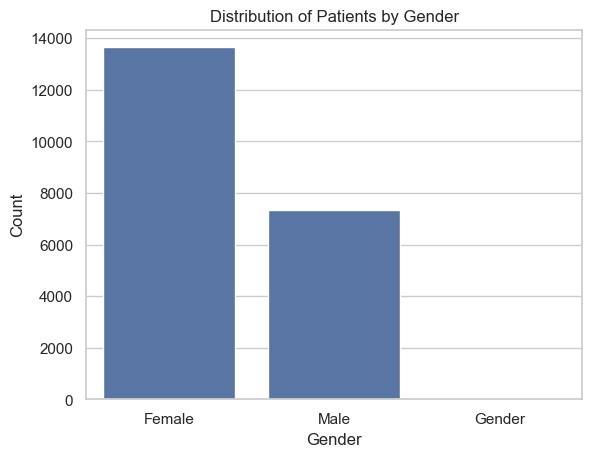

In [60]:
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


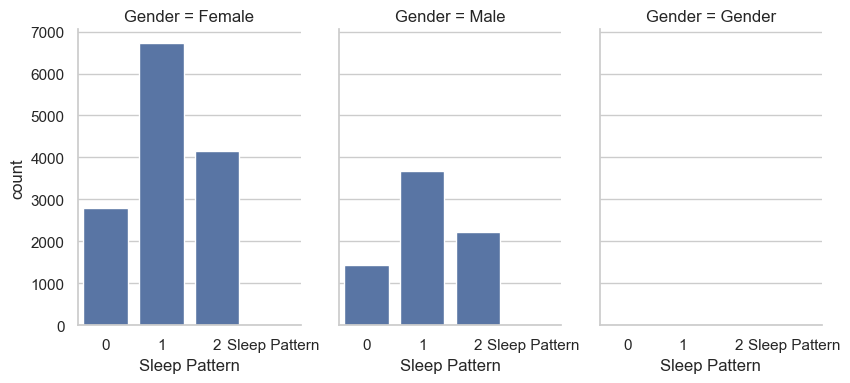

In [62]:
data = (
    df.groupby(['Sleep Pattern','Gender'])['Patient ID']
    .count()
    .to_frame()
    .rename(columns={'Patient ID':'count'})
    .reset_index()
)

g = sns.catplot(
    x="Sleep Pattern", 
    y="count", 
    col="Gender", 
    data=data, 
    kind="bar", 
    height=4, 
    aspect=.7
)
plt.show()


In [65]:
df['Age'].describe()


count     20973
unique       19
top          44
freq       2112
Name: Age, dtype: object

In [67]:
df['BMI'].describe()


count           20973
unique             22
top       31.87857735
freq             1130
Name: BMI, dtype: object

<Axes: >

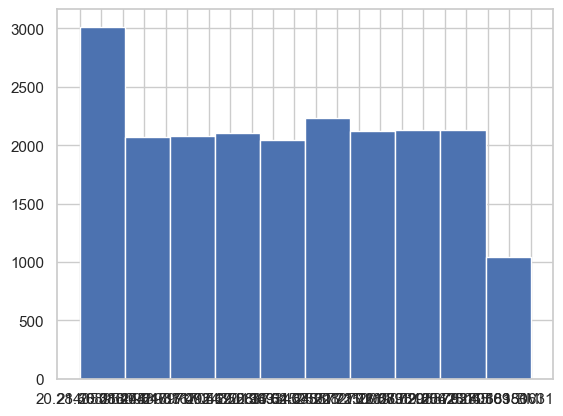

In [69]:
df['BMI'].hist(bins=10)

In [71]:
df[df['Body Temperature']>100]

TypeError: '>' not supported between instances of 'str' and 'int'

## Data Preprocessing

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20975 entries, 0 to 20974
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient ID        20975 non-null  object
 1   Timestamp         20973 non-null  object
 2   Age               20973 non-null  object
 3   Gender            20973 non-null  object
 4   Weight            20973 non-null  object
 5   Height            20973 non-null  object
 6   BMI               20973 non-null  object
 7   Heart Rate        20973 non-null  object
 8   BP Systolic       20973 non-null  object
 9   BP Diastolic      20973 non-null  object
 10  SpO2              19961 non-null  object
 11  Respiration Rate  20973 non-null  object
 12  Body Temperature  20973 non-null  object
 13  Blood Glucose     20973 non-null  object
 14  Activity Level    20973 non-null  object
 15  Sleep Pattern     20973 non-null  object
dtypes: object(16)
memory usage: 2.6+ MB


In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [ ]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [ ]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [ ]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [ ]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [ ]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [ ]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [ ]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [ ]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


## Model Trainer - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

my_params = {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = my_params, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
# for above line of code, feel free to make changes if can be made better

model.fit(x_train,y_train)

In [ ]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

